# Prediction of the heat capacity of inorganic materials using Machine Learning Approach

In [2]:
import os     # OS stands for Operating System and provides ways for python to interact with files or directories
import numpy as np     # Numpy is a package for scientific computing. We'll use it for some of it's math functions
import pandas as pd     # Pandas is a data analysis library which we'll primarily use to handle our dataset
import matplotlib.pyplot as plt  # Matplotlib is the plotting package that we'll use throughout the lab
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
PATH = os.getcwd() #pwd=present working diretory. Permitting python to interact with the files and get the current working directories (getcwd)
data_path = os.path.join(PATH, 'cp_data_demo.csv') #defining the file path

df = pd.read_csv(data_path)
#df
#print(df)
print(f'Original DataFrame shape: {df.shape}')

Original DataFrame shape: (4583, 3)


In [4]:
#from pandas_profiling import ProfileReport   #pandas profile provides report on the input DataFram

In [5]:
df.head(10)

,FORMULA,CONDITION: Temperature (K),PROPERTY: Heat Capacity (J/mol K)
0,B2O3,1400.0,134.306
1,B2O3,1300.0,131.294
2,B2O3,1200.0,128.072
3,B2O3,1100.0,124.516
4,B2O3,1000.0,120.625
5,B2O3,900.0,116.190
6,B2O3,800.0,111.169
7,B2O3,723.0,106.692
8,B2O3,700.0,105.228
9,B2O3,600.0,98.115


In [6]:
df.describe()

,CONDITION: Temperature (K),PROPERTY: Heat Capacity (J/mol K)
count,4579.000000,4576.000000
mean,1170.920341,107.483627
std,741.254366,67.019055
min,-2000.000000,-102.215000
25%,600.000000,61.312500
50%,1000.000000,89.497000
75%,1600.000000,135.645000
max,4700.000000,494.967000


In [7]:
profile = ProfileReport(df.copy, title='Pandas Profiling Report of Cp dataset', html={'style':{'full_width':True}})
profile
#profile.to_file("Analysis.json")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORMULA                            4579 non-null   object 
 1   CONDITION: Temperature (K)         4579 non-null   float64
 2   PROPERTY: Heat Capacity (J/mol K)  4576 non-null   float64
dtypes: float64(2), object(1)
memory usage: 107.5+ KB


looking at the row, labelled as count; it implies that we have 4579, 4576 values in the Tempt and Heat Capacity respectively. Meanwhile we have 4583 data samples, each with 3 variables by using print(f'Original DataFrame shape: {df.shape}') to print the shape above. It means some data are missing. so, 4583-4579=5 data is missing for tempt and 4583-4576=7 data is missing for heat capacity

also, negative temperature, heat capacity is an unrealistic value and should all be handled

In [9]:
df["FORMULA"].value_counts() #it provides the number of times each formulae appeared. 

W1       49
N1Ti1    44
N1Zr1    39
B1Ti1    38
O2Zr1    36
         ..
I4Si1     4
I4Mo1     4
K1        4
I4Ti1     3
N2O4      3
Name: FORMULA, Length: 244, dtype: int64

# Rename the column names for brevity

In [10]:
df.columns

Index(['FORMULA', 'CONDITION: Temperature (K)',
       'PROPERTY: Heat Capacity (J/mol K)'],
      dtype='object')

In [11]:
rename_dict = {'FORMULA': 'formula', 'CONDITION: Temperature (K)' : 'T', 'PROPERTY: Heat Capacity (J/mol K)': 'Cp' }
df = df.rename(columns=rename_dict)
df.columns

Index(['formula', 'T', 'Cp'], dtype='object')

In [12]:
df.head(5)

,formula,T,Cp
0,B2O3,1400.0,134.306
1,B2O3,1300.0,131.294
2,B2O3,1200.0,128.072
3,B2O3,1100.0,124.516
4,B2O3,1000.0,120.625


In [13]:
df2=df.copy() #making a copy of the original dataset  for us to work on(remove NaN and other things)
bool_nans_formula=df2['formula'].isnull() #handling the part of the column that is null (empty) in the new dataframe that we now have(i.e the copy)
bool_nans_T=df2['T'].isnull()
bool_nans_Cp=df2['Cp'].isnull()

# Drop the rows of the DataFrame which contain NaNs
df2 = df2.drop(df2.loc[bool_nans_formula].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_T].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_Cp].index, axis=0)

print(f'DataFrame shape before dropping NaNs: {df.shape}')
print('DataFrame shape after dropping NaNs: ',df2.shape) 

DataFrame shape before dropping NaNs: (4583, 3)
DataFrame shape after dropping NaNs:  (4570, 3)


In [14]:
df3=df.copy()
df3=df3.dropna(axis=0, how='any')

print(f'DataFrame shape before dropping NaNs: {df.shape}')
print(f'DataFrame shape after dropping NaNs: {df3.shape}')
print('DataFrame shape is {} after dropping NaNs '.format(df3.shape))

DataFrame shape before dropping NaNs: (4583, 3)
DataFrame shape after dropping NaNs: (4570, 3)
DataFrame shape is (4570, 3) after dropping NaNs 


In [15]:
df = df3.copy() #replacing the original dataset with the cleaned dataset


In [16]:
bool_invalid_T=df['T']<0
bool_invalid_Cp=df['Cp']<0

df=df.drop(df.loc[bool_invalid_T].index, axis=0)
df=df.drop(df.loc[bool_invalid_Cp].index, axis=0)

print('Cleaned DataFrame shape: ',df.shape)

Cleaned DataFrame shape:  (4564, 3)


we can save the cleaned. Pandas allows us to save our data as a comma separated value .csv or other file (SQL, etc).

In [17]:
out_path=os.path.join(PATH, 'cp_data_cleaned.csv')
df.to_csv(out_path, index=False)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
rnd_seed = 42
np.random.seed(seed=rnd_seed)

In [20]:
X= df[['formula','T']]
y= df['Cp']

In [21]:
print('shape of X is:', X.shape)
print(f'shape of y: {y.shape}')

shape of X is: (4564, 2)
shape of y: (4564,)


In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=rnd_seed)
print(X_train.shape)
print(X_test.shape)
print(X_train)


(3651, 2)
(913, 2)
       formula       T
3175     O3Ti2  1500.0
1021   Co1O4S1  1500.0
4455       Sr1   400.0
230     Br3Zr1   500.0
858      C1Be2  1900.0
...        ...     ...
4444       Sr1  1300.0
467   Al1Cl6K3  1800.0
3098     Nb1O1  1100.0
3784     Mo2S3  2100.0
861      C1Be2  1600.0

[3651 rows x 2 columns]


<AxesSubplot:>

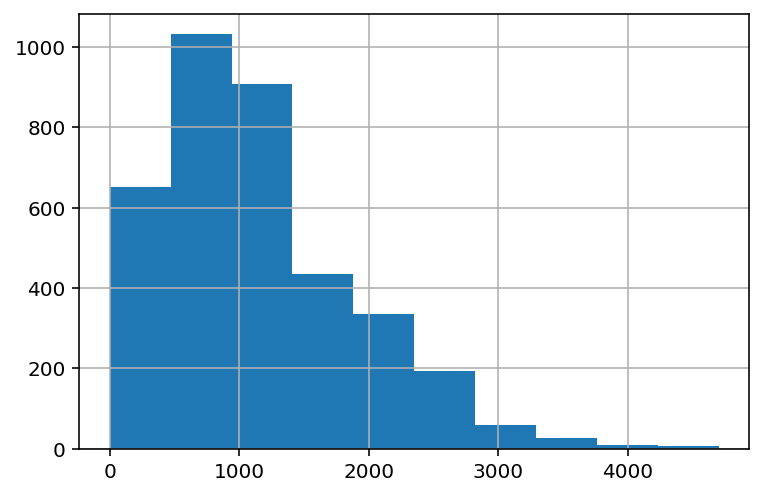

In [23]:
X_train["T"].hist()

<AxesSubplot:>

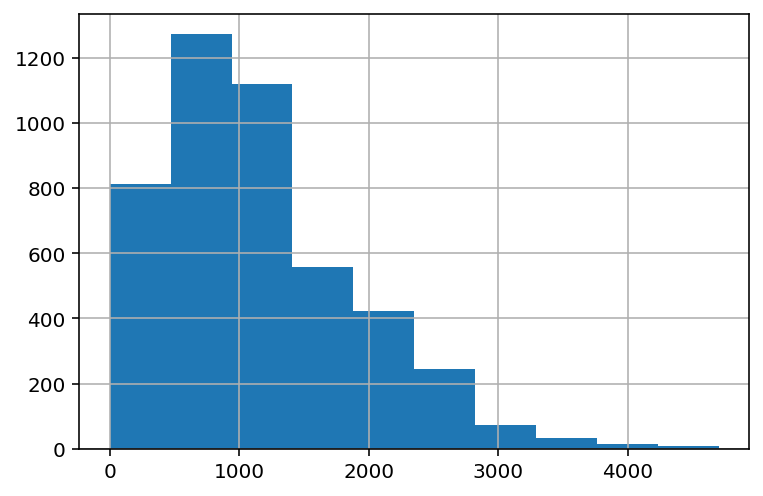

In [24]:
X["T"].hist()

In [25]:
X_train

,formula,T
3175,O3Ti2,1500.0
1021,Co1O4S1,1500.0
4455,Sr1,400.0
230,Br3Zr1,500.0
858,C1Be2,1900.0
...,...,...
4444,Sr1,1300.0
467,Al1Cl6K3,1800.0
3098,Nb1O1,1100.0
3784,Mo2S3,2100.0


In [26]:
num_rows = len(X_train)
print(f'There are in total {num_rows} rows in the X_train DataFrame.')

num_unique_formulae = len(X_train['formula'].unique())
print(f'But there are only {num_unique_formulae} unique!\n')
      
print('Unique formulae and their number of occurances in the X_train DataFrame:')
print(X_train['formula'].value_counts(), '\n')
print('Unique formulae and their number of occurances in the X_test DataFrame:')
print(X_test['formula'].value_counts())

There are in total 3651 rows in the X_train DataFrame.
But there are only 244 unique!

Unique formulae and their number of occurances in the X_train DataFrame:
W1       40
N1Ti1    38
N1Zr1    33
B1Ti1    33
O2Zr1    30
         ..
I2        4
N2O4      3
K1        2
I4Ti1     1
Hg1O1     1
Name: formula, Length: 244, dtype: int64 

Unique formulae and their number of occurances in the X_test DataFrame:
Ca1S1       10
Be2O4Si1    10
N0.465V1    10
W1           9
S1Sr1        9
            ..
I2Sr1        1
B2O3         1
H2Mg1        1
Ca1H2O2      1
I4Zr1        1
Name: formula, Length: 229, dtype: int64


First we get a list of all of the unique formulae in the dataset.

In [27]:
unique_formulae = X['formula'].unique()
print(f'{len(unique_formulae)} unique formulae:\n{unique_formulae}')

244 unique formulae:
['B2O3' 'Be1I2' 'Be1F3Li1' 'Al1Cl4K1' 'Al2Be1O4' 'B2H4O4' 'B2Mg1' 'Be1F2'
 'B1H4Na1' 'Br2Ca1' 'Al1N1' 'Al1Cl6Na3' 'Ba1H2O2' 'Al1Br3' 'Br3Zr1'
 'Br2Ti1' 'B1Ti1' 'Be2O4Si1' 'Br2Pb1' 'Al1' 'Br2Hg2' 'B1H3O3' 'Br3Ti1'
 'C1Cu1N1' 'B1' 'Al1F6Na3' 'Ca1H2O2' 'B2Be3O6' 'Al1Cl4Na1' 'Al1Cl6K3'
 'C0.98Nb1' 'Br2Hg1' 'Al1Cl1O1' 'Cl1H4N1O4' 'Be1F4Li2' 'C1Mg1O3' 'Br1H4N1'
 'Ca1I2' 'Al1F6Li3' 'Br4Mo1' 'Ba1' 'Br4Ti1' 'Ba1Br2' 'Be1O4S1' 'Ba1F2'
 'Ba1I2' 'Cl2Fe1' 'C1K1N1' 'Be1H2O2' 'Cs1' 'Al1H4Li1' 'C1Be2' 'Cr1'
 'Cs2O4S1' 'Cl1Cu1' 'Cu1F2' 'Al2O3' 'B1N1' 'Co1O4S1' 'Cu1O1' 'Br1Na1'
 'Cr2O3' 'Cs1F1' 'Cr2N1' 'Cl1Li1' 'Fe0.877S1' 'Cl1Na1' 'F2Hg1' 'Fe1H2O2'
 'Cs1H1O1' 'Br3Mo1' 'Br2Sr1' 'Cl2Hg2' 'Fe1O1' 'Co1' 'Cl1Cs1' 'Cu1H2O2'
 'Al1Li1O2' 'Co1F2' 'Br2Fe1' 'Fe1I2' 'Ga1' 'Cl1Li1O4' 'Cl2Cu1' 'Fe0.947O1'
 'Be1Cl2' 'Cl1K1' 'F1Na1' 'H3O4P1' 'Fe3O4' 'H1Na1O1' 'Fe2O12S3' 'H1Na1'
 'Cl1Na1O4' 'B1F4K1' 'Cu1O4S1' 'H1Li1' 'F2H1K1' 'B1H4Li1' 'Hg1O1' 'Be3N2'
 'Fe1' 'I2Mo1' 'Cu1F1' 'Cr1N1' 'Fe1H3O3' 'I1Li1

In [28]:
# Next is to set a random seed to ensure reproducibility across runs i.e whenever it is run (probably for another model or any other time it is run), the same value of test and train set remains the same.
np.random.seed(seed=rnd_seed)

# Store a list of all unique formulae which can now be splitted manually
all_formulae = unique_formulae.copy()

# Define the proportional size of the dataset split
val_size = 0.20
test_size = 0.10
train_size = 1 - val_size - test_size

# Calculate the number of samples in each dataset split
num_val_samples = int(round(val_size * len(unique_formulae)))
num_test_samples = int(round(test_size * len(unique_formulae)))
num_train_samples = int(round((1 - val_size - test_size) * len(unique_formulae)))

# Randomly choose the formulate for the validation dataset, and remove those from the unique formulae list
val_formulae = np.random.choice(all_formulae, size=num_val_samples, replace=False)
all_formulae = [f for f in all_formulae if f not in val_formulae]

# Randomly choose the formulate for the test dataset, and remove those from the unique formulae list
test_formulae = np.random.choice(all_formulae, size=num_test_samples, replace=False)
all_formulae = [f for f in all_formulae if f not in test_formulae]

# The remaining formulae will be used for the training dataset
train_formulae = all_formulae.copy()

print('Number of training formulae:', len(train_formulae))
print('Number of validation formulae:', len(val_formulae))
print('Number of testing formulae:', len(test_formulae))

Number of training formulae: 171
Number of validation formulae: 49
Number of testing formulae: 24


In [29]:
# Split the original dataset into the train/validation/test datasets using the formulae lists above
df_train = df[df['formula'].isin(train_formulae)]
df_val = df[df['formula'].isin(val_formulae)]
df_test = df[df['formula'].isin(test_formulae)]

print(f'train dataset shape: {df_train.shape}')
print(f'validation dataset shape: {df_val.shape}')
print(f'test dataset shape: {df_test.shape}\n')

print(df_train.head(), '\n')
print(df_val.head(), '\n')
print(df_test.head(), '\n')

train dataset shape: (3214, 3)
validation dataset shape: (980, 3)
test dataset shape: (370, 3)

  formula       T       Cp
0    B2O3  1400.0  134.306
1    B2O3  1300.0  131.294
2    B2O3  1200.0  128.072
3    B2O3  1100.0  124.516
4    B2O3  1000.0  120.625 

   formula       T      Cp
83   B2Mg1  1900.0  92.242
84   B2Mg1  1800.0  90.249
85   B2Mg1  1700.0  88.162
86   B2Mg1  1600.0  85.981
87   B2Mg1  1500.0  83.643 

     formula       T       Cp
193  Ba1H2O2  900.00  134.892
194  Ba1H2O2  800.00  130.834
195  Ba1H2O2  700.00  126.775
196  Ba1H2O2  681.15  126.022
197  Ba1H2O2  600.00  122.717 



In [30]:
train_formulae = set(df_train['formula'].unique())
val_formulae = set(df_val['formula'].unique())
test_formulae = set(df_test['formula'].unique())

common_formulae1 = train_formulae.intersection(test_formulae)
common_formulae2 = train_formulae.intersection(val_formulae)
common_formulae3 = test_formulae.intersection(val_formulae)

print(f'# of common formulae in intersection 1: {len(common_formulae1)}; common formulae: {common_formulae1}')
print(f'# of common formulae in intersection 2: {len(common_formulae2)}; common formulae: {common_formulae2}')
print(f'# of common formulae in intersection 3: {len(common_formulae3)}; common formulae: {common_formulae3}')

# of common formulae in intersection 1: 0; common formulae: set()
# of common formulae in intersection 2: 0; common formulae: set()
# of common formulae in intersection 3: 0; common formulae: set()


In [31]:
# saving these splits into csv files
PATH = os.getcwd()

train_path = os.path.join(PATH, 'cp_train.csv')
val_path = os.path.join(PATH, 'cp_val.csv')
test_path = os.path.join(PATH, 'cp_test.csv')

df_train.to_csv(train_path, index=False)
df_val.to_csv(val_path, index=False)
df_test.to_csv(test_path, index=False)

In [32]:
from collections import OrderedDict    # Collections is a package for handling data

We will start with the dataset splits that we saved from the last notebook.

In [33]:
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')
print(f'df_val DataFrame shape: {df_val.shape}')
print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (3214, 3)
df_val DataFrame shape: (980, 3)
df_test DataFrame shape: (370, 3)


In [34]:
# Sub-sample the data. Set the random_state to make the sampling reproducible every time.
df_train_sampled = df_train.sample(n=2000, random_state=rnd_seed)
df_val_sampled = df_val.sample(n=200, random_state=rnd_seed)
df_test_sampled = df_test.sample(n=200, random_state=rnd_seed)

print(f'df_train_sampled DataFrame shape: {df_train_sampled.shape}')
print(f'df_val_sampled DataFrame shape: {df_val_sampled.shape}')
print(f'df_test_sampled DataFrame shape: {df_test_sampled.shape}')

df_train_sampled DataFrame shape: (2000, 3)
df_val_sampled DataFrame shape: (200, 3)
df_test_sampled DataFrame shape: (200, 3)


To featurize the chemical compositions from a chemical formula (e.g. "Al2O3") into a composition-based feature vector (CBFV)

In [35]:
# Import the package and the generate_features function
from CBFV.composition import generate_features

The generate_features function from the CBFV package expects an input DataFrame containing at least the columns ['formula', 'target']. You may also have extra feature columns (e.g., temperature or pressure, other measurement conditions, etc.).

In our dataset, Cp represents the target variable, and T is the measurement condition. Since the generate_features function expects the target variable column to be named target, we have to rename the Cp column.

In [36]:
print('DataFrame column names before renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

rename_dict = {'Cp': 'target'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

df_train_sampled = df_train_sampled.rename(columns=rename_dict)
df_val_sampled = df_val_sampled.rename(columns=rename_dict)
df_test_sampled = df_test_sampled.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')


In [37]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...:  12%|█▏        | 246/2000 [00:00<00:00, 2365.64it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 2000/2000 [00:00<00:00, 3027.35it/s]


	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 200/200 [00:00<00:00, 2499.57it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 200/200 [00:00<00:00, 2273.40it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


In [38]:
X_train_unscaled.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,T
0,32.0,65.116040,8.0,30.0,15.0,1.0,2.0,0.0,162.0,2.0,...,63.25,77.35,0.00125,0.710,0.3604,2.79280,0.02598,90.0,0.934,600.0
1,28.0,53.491200,9.0,36.0,43.0,0.0,6.0,0.0,544.0,2.0,...,14.05,20.25,0.00007,14.304,0.5868,0.44936,0.18150,218.0,0.000,457.7
2,46.0,98.887792,14.0,72.0,36.0,3.0,4.0,0.0,441.0,4.0,...,53.35,85.05,0.00170,0.820,0.2552,3.26980,0.02790,79.0,0.840,300.0
3,20.0,41.988171,5.0,18.0,9.0,1.0,1.0,0.0,95.0,1.0,...,53.35,85.05,0.00170,0.820,0.2552,3.26980,0.02790,79.0,0.840,2800.0
4,82.0,207.200000,6.0,14.0,5.0,1.0,0.0,0.0,81.0,1.0,...,600.65,2013.15,11.40000,0.130,4.7990,177.70000,35.30000,196.0,2.030,1400.0


In [39]:
X_train_unscaled.shape

(2000, 309)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [41]:
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [42]:
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

In [43]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In addition, we define some helper functions.

In [44]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

Build an empty DataFrame to store model results:

In [45]:
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


In [46]:
# Build a dictionary of model names
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
})

In [47]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor
Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model svr: SVR
Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 9 models, total time: 110.55 s


In [48]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000000,0.000000,47.451805,60.600844,-0.000090,52.577391,71.971190
1,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",2.381410,0.739347,18.191656,30.939250,0.644943,26.156172,42.883302
2,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.028343,0.778935,16.718459,28.493016,0.692202,22.574844,39.927490
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.211662,0.982221,3.877345,8.080383,0.768216,23.973951,34.648242
4,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",8.149069,0.923498,14.145190,16.761557,0.839587,21.745505,28.824307
5,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.155958,0.904140,12.359416,18.762775,0.866957,17.505206,26.250392
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",48.823529,0.998363,1.221557,2.452111,0.893264,15.132261,23.512223
7,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",24.425109,0.999995,0.010897,0.134942,0.896683,13.674303,23.132575
8,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",22.645746,0.985324,5.356380,7.341458,0.907966,15.133807,21.833037


Now, we can look at the results.

You will notice, that some of the models (such as RandomForestRegressor, ExtraTreesRegressor and GradientBoostingRegressor) have completely memorized the training data, as evidenced by the very high r2_train scores of ~1.0.

In [49]:
classic_models

OrderedDict([('dumr', DummyRegressor()),
             ('rr', Ridge()),
             ('abr', AdaBoostRegressor()),
             ('gbr', GradientBoostingRegressor()),
             ('rfr', RandomForestRegressor()),
             ('etr', ExtraTreesRegressor()),
             ('svr', SVR()),
             ('lsvr', LinearSVR()),
             ('knr', KNeighborsRegressor())])

## Evaluating model performance on validation dataset

Now comes the time to evaluate the trained models on the validation set.

Remember, we use the same validation set to evaluate all models. This ensures a fair comparison.

In addition, we plot the predicted vs. actual plots using the predictions made by each trained model on the same validation set.

In [50]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

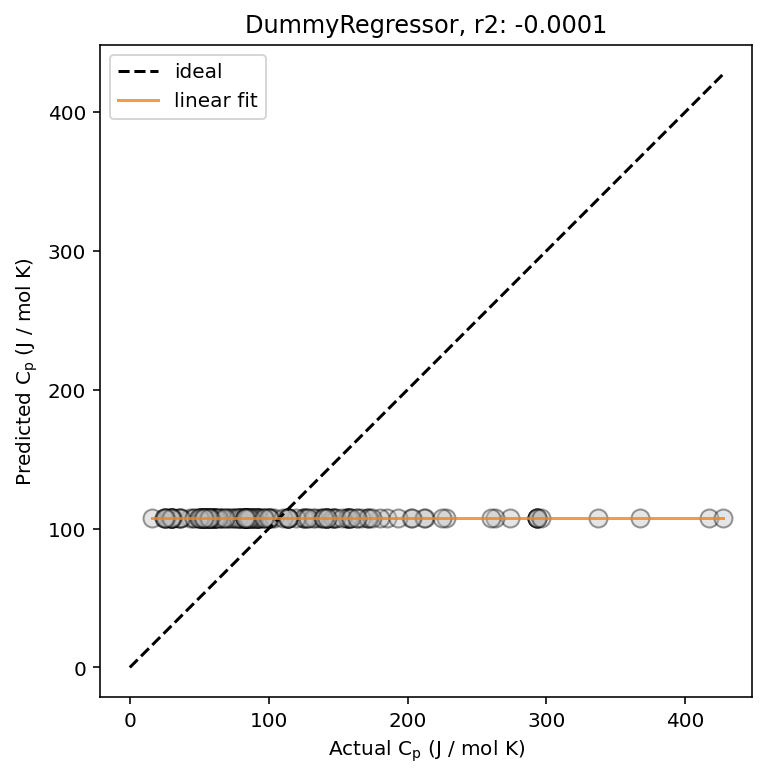

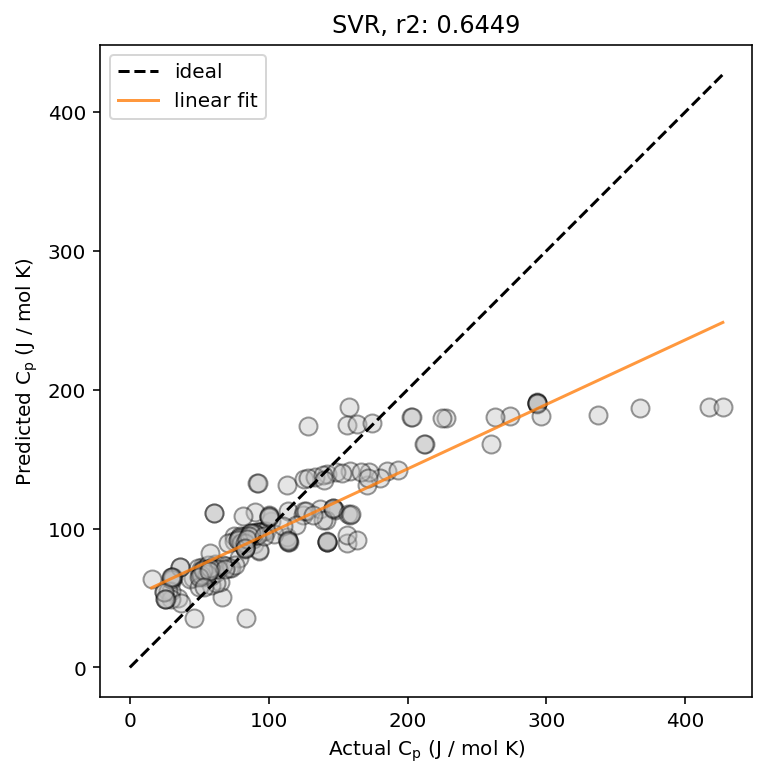

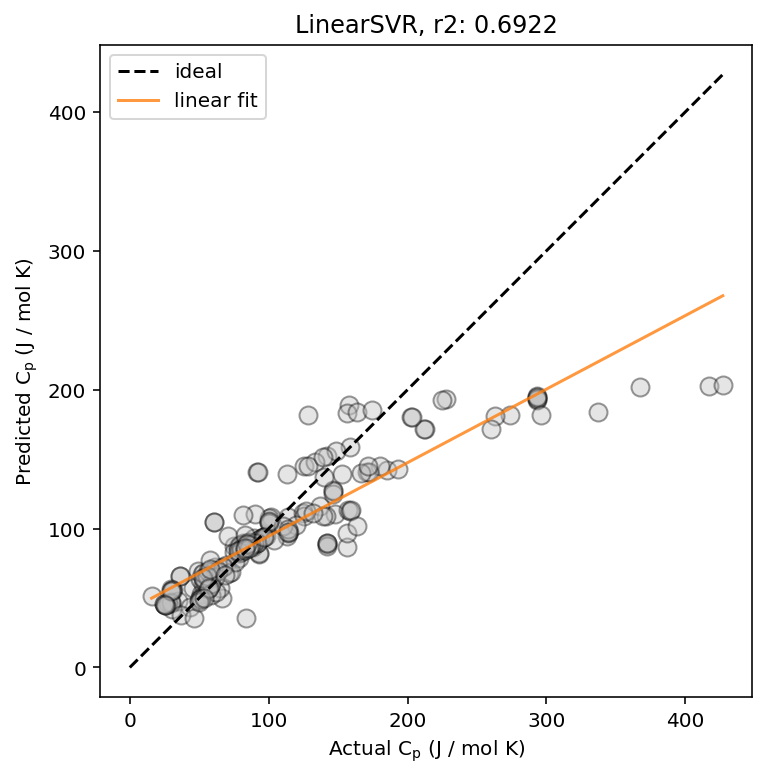

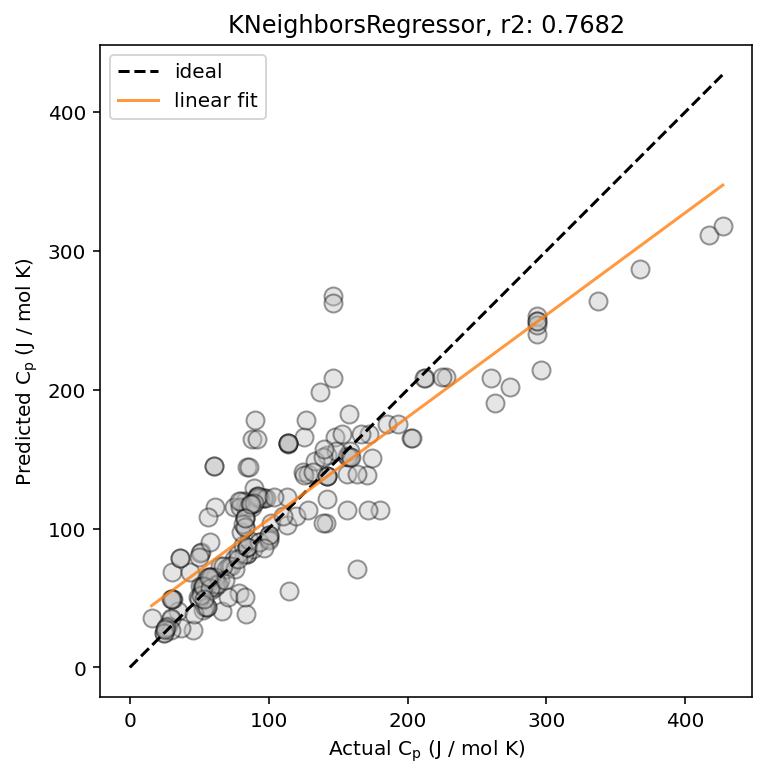

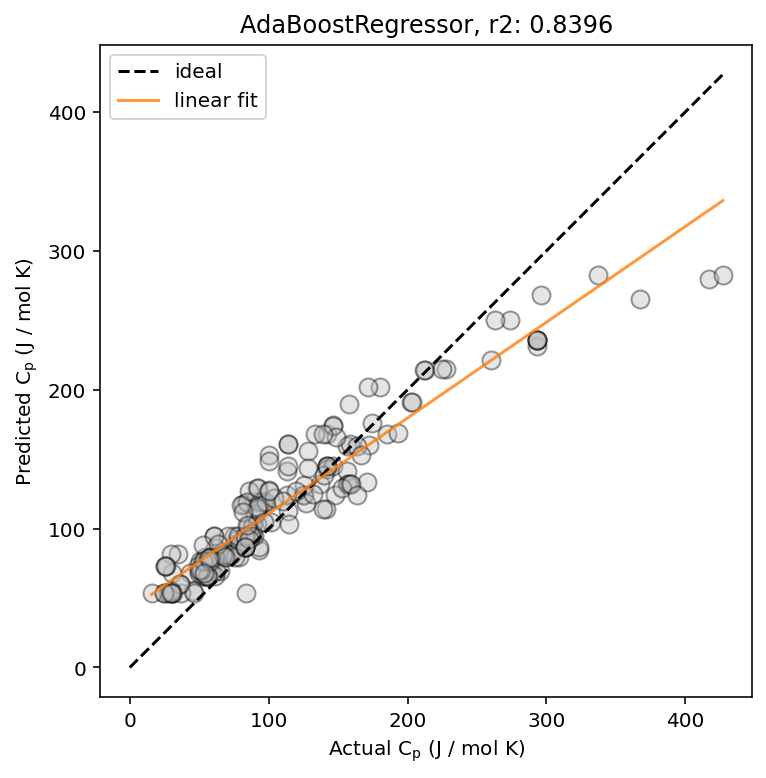

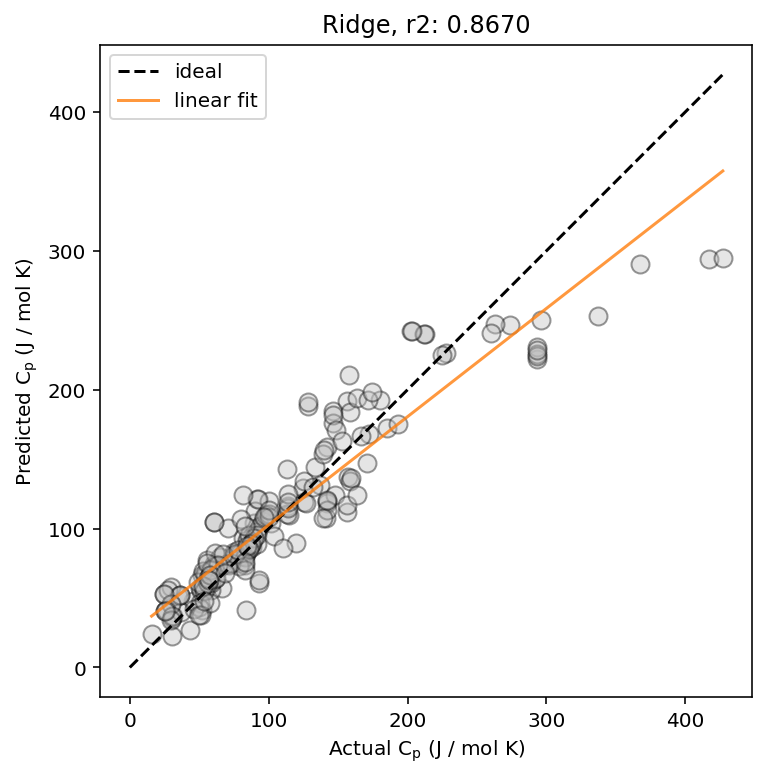

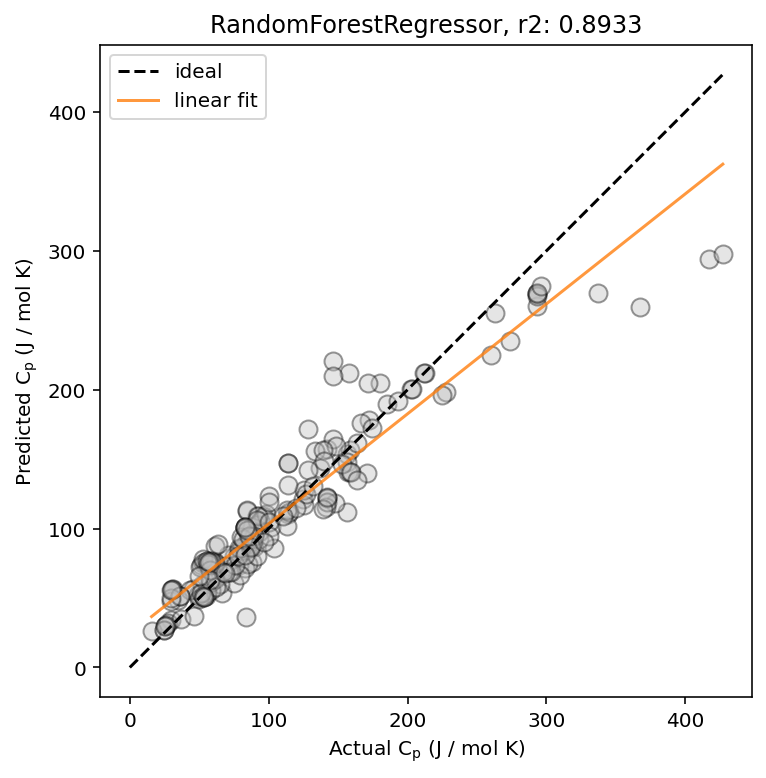

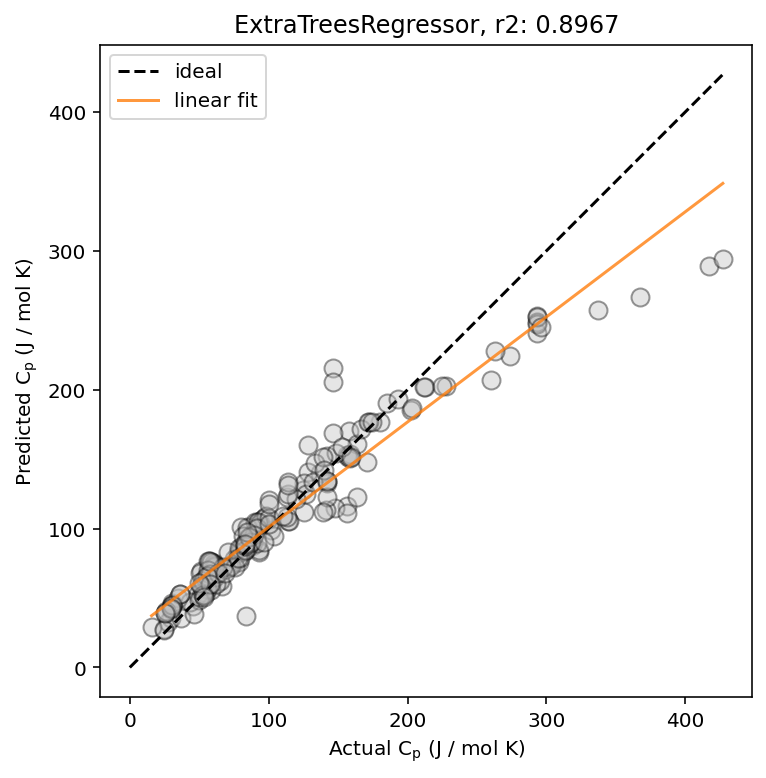

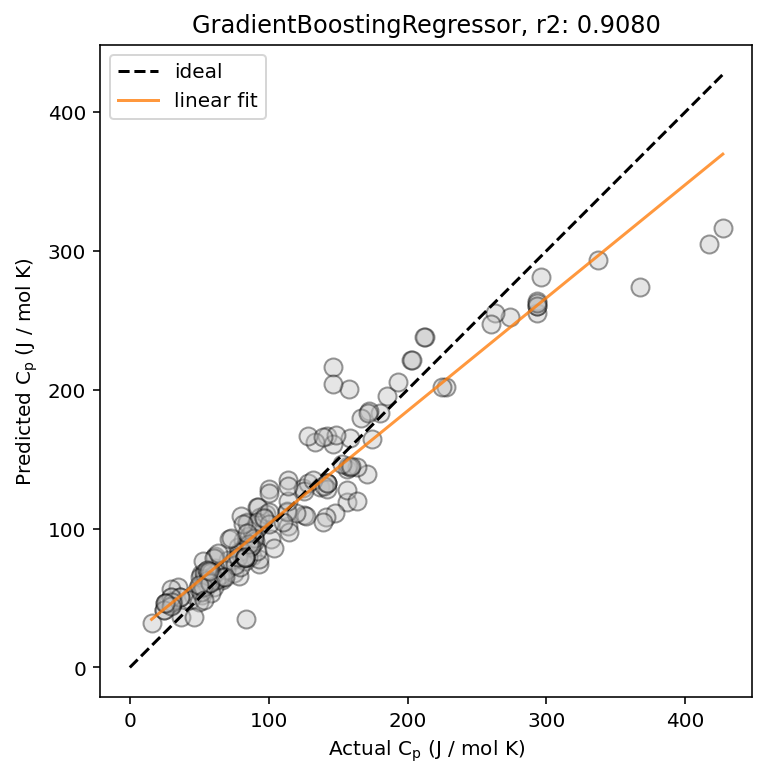

In [51]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    plot=plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

## Re-training the best-performing model on combined train + validation dataset

After you have finalized your model, you can re-train your model (using the same hyperparameters) again on the combined train + validation datasets, and finally, evaluate your model on the held-out test dataset.

By training on the combined train + validation dataset after you have finished tuning your model, you give it more training data, which should lead to an increase in the model performance.

In [52]:
# Find the best-performing model that we have tested
best_row = df_classics.iloc[-1, :].copy()

# Get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

# Instantiate the model again using the parameters
model = classic_model_names[model_name](**model_params)
print(model)

GradientBoostingRegressor()


In [53]:
# Concatenate the train and validation datasets together
X_train_new = np.concatenate((X_train, X_val), axis=0)
y_train_new = pd.concat((y_train, y_val), axis=0)

print(X_train_new.shape)

(2200, 309)


# Finally, we can fit the model on the combined train + validation dataset.

In [54]:
ti = time()

model.fit(X_train_new, y_train_new)

dt = time() - ti
print(f'Finished fitting best model, total time: {dt:0.2f} s')

Finished fitting best model, total time: 22.39 s


# Testing the re-trained model on the test dataset

After re-fitting the best model on the train+validation dataset, you can finally test it on the test dataset.
**Remember:** you should only do this *once!*

r2: 0.8216
mae: 18.8100
rmse: 33.2091


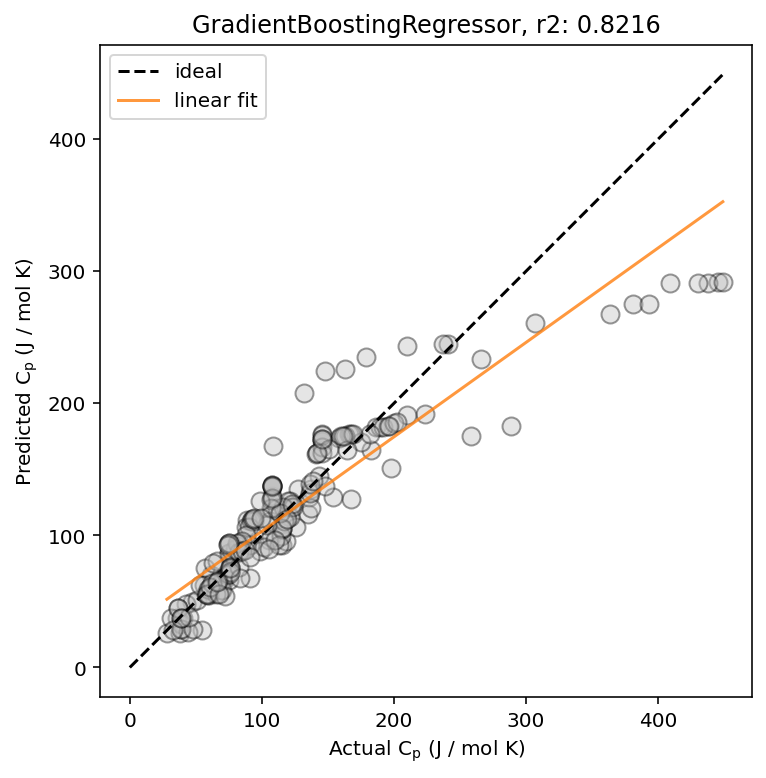

In [55]:
y_act_test = y_test
y_pred_test = model.predict(X_test)

r2, mae, rmse = evaluate_model(model, X_test, y_test)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')

plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

We see that our model achieves decent performance on the held-out test dataset.

# Effect of train/validation/test dataset split

Using different train/validation/test splits can dramatically affect your model performance, even for classical ML models.

Here, we provide a little demonstration.

In [56]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...:  12%|█▏        | 377/3214 [00:00<00:00, 3331.09it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3214/3214 [00:00<00:00, 4564.10it/s]


	Creating Pandas Objects...


Assigning Features...:  48%|████▊     | 466/980 [00:00<00:00, 4107.53it/s]

	Featurizing Compositions...


Processing Input Data:   0%|          | 0/370 [00:00<?, ?it/s]

	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 370/370 [00:00<00:00, 3557.38it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


In [57]:
X_train_original = X_train_unscaled.copy()
X_val = X_val_unscaled.copy()
X_test = X_test_unscaled.copy()

y_train_original = y_train.copy()

We sample the training data using 10 random seeds, by using the `DataFrame.sample()` method with seeds ranging from 0 to 9.
We then fit 10 models, each on one of the random splits, and evaluate their performance on the same validation dataset.

In [58]:
splits = range(10)
df_splits = pd.DataFrame(columns=['split',
                                  'r2_train',
                                  'mae_train',
                                  'rmse_train',
                                  'r2_val',
                                  'mae_val',
                                  'rmse_val'])

for split in splits:
    print(f'Fitting and evaluating random split {split}')
    X_train = X_train_original.sample(frac=0.7, random_state=split)
    y_train = y_train_original[X_train.index]

    scaler = StandardScaler()
    X_train = normalize(scaler.fit_transform(X_train))
    X_val = normalize(scaler.transform(X_val_unscaled))
    X_test = normalize(scaler.transform(X_test_unscaled))
    
    model = AdaBoostRegressor()
    model.fit(X_train, y_train)
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_val)
    result_dict = {
        'split': split,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    
    df_splits = append_result_df(df_splits, result_dict)

Fitting and evaluating random split 0
Fitting and evaluating random split 1
Fitting and evaluating random split 2
Fitting and evaluating random split 3
Fitting and evaluating random split 4
Fitting and evaluating random split 5
Fitting and evaluating random split 6
Fitting and evaluating random split 7
Fitting and evaluating random split 8
Fitting and evaluating random split 9


In [59]:
df_splits['split'] = df_splits['split'].astype(int)
df_splits

,split,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,0,0.924411,13.944471,16.677244,0.817451,24.083920,34.312196
1,1,0.926312,13.683928,16.415738,0.809339,24.840058,35.066345
2,2,0.927361,13.603718,16.536317,0.822164,23.098069,33.866389
3,3,0.931193,13.152535,16.002014,0.841611,21.366565,31.961048
4,4,0.925246,13.892643,16.602724,0.820281,24.368322,34.045256
5,5,0.925551,14.017381,16.609464,0.817996,24.055071,34.260988
6,6,0.924670,14.272290,16.839028,0.804468,25.134305,35.511425
7,7,0.922404,14.184148,16.781029,0.824973,23.875616,33.597884
8,8,0.925025,13.888555,16.531313,0.822661,23.749629,33.819008
9,9,0.919708,14.185107,16.936880,0.821596,24.339583,33.920465


We then plot the train and validation $r^2$ scores for each of the 10 models.

Note the high variability in the r2_val score. In contrast, the variability in the r2_train score is comparatively lower.

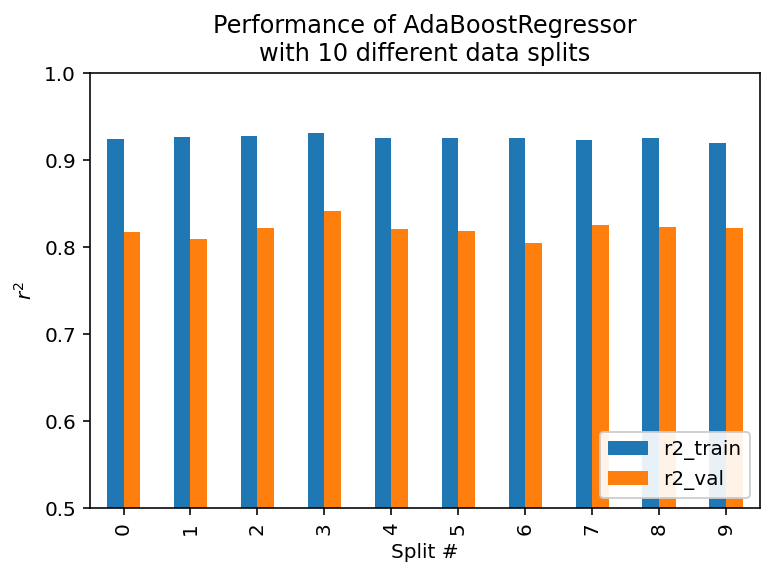

In [60]:
df_splits.plot('split', ['r2_train', 'r2_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylim((0.5, 1.0))
plt.ylabel('$r^2$')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

This effect is even more pronounced when we plot the mean abolute error (MAE).

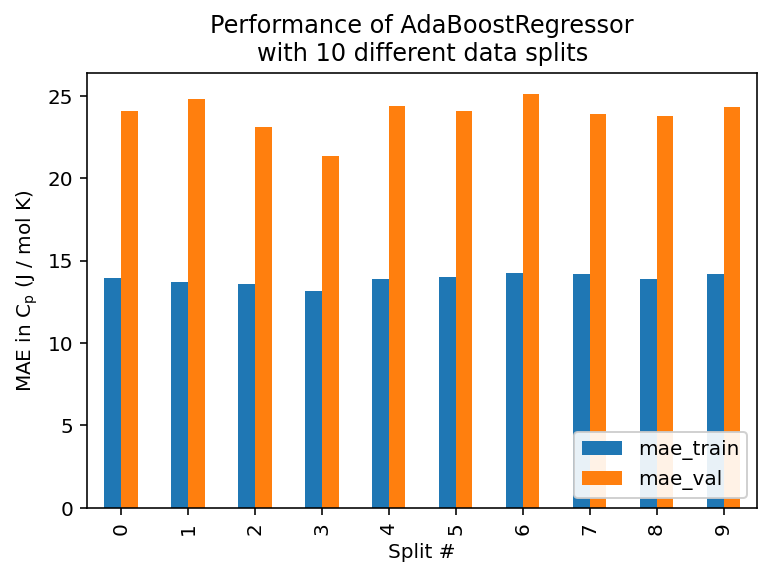

In [61]:
df_splits.plot('split', ['mae_train', 'mae_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylabel('MAE in $\mathrm{C}_\mathrm{p}$ (J / mol K)')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

Therefore, typically the average value of all the scores are reported, as this gives a much more accurate estimate of how well the model actually performs.

In [62]:
avg_r2_val = df_splits['r2_val'].mean()
avg_mae_val = df_splits['mae_val'].mean()

print(f'Average validation r2: {avg_r2_val:0.4f}')
print(f'Average validation MAE: {avg_mae_val:0.4f}')

Average validation r2: 0.8203
Average validation MAE: 23.8911



# Modeling using neural network / deep learning-based models

In this notebook, we will cover how to implement a simple neural network for the modeling of heat capacity.

We will load, prepare featurize, and scale/normalize the input datasets the same way as we did in the pervious notebook. For more information about the individual steps, you can consult that notebook.

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from collections import OrderedDict

from CBFV.composition import generate_features

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import torch.optim as optim


# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(RNG_SEED)
torch.manual_seed(RNG_SEED)

# Featurizing and scaling data

Nothing new here---same steps as we've done earlier

In [66]:
PATH = os.getcwd()
train_path = os.path.join(PATH, 'cp_train.csv')
val_path = os.path.join(PATH, 'cp_val.csv')
test_path = os.path.join(PATH, 'cp_test.csv')

df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')
print(f'df_val DataFrame shape: {df_val.shape}')
print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (3214, 3)
df_val DataFrame shape: (980, 3)
df_test DataFrame shape: (370, 3)


Here we do not sub-sample the datasets into smaller datasets like we did in the previous notebook.
Typically, the more data you have for neural networks, the better the networks will be able to train, and the better they will perform (as long as they are well-conditioned).

Additionally, the performance of `PyTorch` is very good for modern computers, especially if you have a modern CUDA-capable graphics processing unit (GPU) such as an Nvidia GPU to accelerate the computations.
Our dataset is small enough to fit into almost all modern computers or CUDA-capable GPUs.

In [67]:
rename_dict = {'Cp': 'target'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...:   9%|▊         | 277/3214 [00:00<00:01, 2621.61it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3214/3214 [00:01<00:00, 2942.75it/s]


	Creating Pandas Objects...


Assigning Features...:  40%|███▉      | 391/980 [00:00<00:00, 3759.25it/s]

	Featurizing Compositions...


Assigning Features...: 100%|██████████| 980/980 [00:00<00:00, 3965.83it/s]


	Creating Pandas Objects...


Assigning Features...: 100%|██████████| 370/370 [00:00<00:00, 3083.46it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


In [68]:
X_train_unscaled.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,T
0,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1400.0
1,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1300.0
2,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1200.0
3,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1100.0
4,34.0,69.6202,10.0,74.0,33.0,0.0,3.0,2.0,405.0,5.0,...,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62,1000.0


In [69]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

# Building a neural network

This is where you get to be the architect, and design your own neural network!

For sake of clarity (and to ensure that this tutorial runs on all the potatoes of this world), we will define a simple dense fully-connected neural network (which we will call `DenseNet`) as an example.

The input layer of `DenseNet` accepts input data in the dimension of each row of the input data, which is equal to the number of features in our CBFV featurization scheme.
In our particular example, when featurized using the `oliynyk` featurizer, the input dimension is 177 (it is the second dimension when you view `X_train.shape`).

The output layer dimension of `DenseNet` is 1, because we want to predict one value (heat capacity).

In addition, `DenseNet` can have one or more "hidden layers" that are attached between the input and output layers. These can be any arbitrary dimensions $>1$ you want to choose.

# Defining the network in PyTorch

In [71]:
class DenseNet(nn.Module):
    """
    This implements a dynamically-built dense fully-connected neural network
    with leaky ReLU activation and optional dropout.

    Parameters
    ----------
    input_dims: int
        Number of input features (required).
    hidden_dims: list of ints
        Number of hidden features, where each integer represents the number of
        hidden features in each subsequent hidden linear layer (optional,
        default=[64, 32]).
    output_dims: int
        Number of output features (optional, default=1).
    dropout: float
        the dropout value (optional, default=0.0).
    """
    def __init__(self,
                 input_dims,
                 hidden_dims=[64, 32],
                 output_dims=1,
                 dropout=0.0):
        super().__init__()

        self.input_dims = input_dims
        self.hidden_dims = hidden_dims
        self.output_dims = output_dims

        self.dropout = dropout
        
        # Build a sub-block of linear networks
        def fc_block(in_dim, out_dim, *args, **kwargs):
            return nn.Sequential(
                nn.Linear(in_dim, out_dim, *args, **kwargs),
                nn.Dropout(p=self.dropout),
                nn.LeakyReLU()
                )

        # Build overall network architecture
        self.network = nn.ModuleList([
                nn.Sequential(
                    nn.Linear(input_dims, self.hidden_dims[0]),
                    nn.Dropout(p=self.dropout),
                    nn.LeakyReLU())
                ]
            )

        hidden_layer_sizes = zip(self.hidden_dims[:-1], self.hidden_dims[1:])
        self.network.extend([
            fc_block(in_dim, out_dim) for in_dim, out_dim
            in hidden_layer_sizes]
            )

        self.network.extend([
            nn.Linear(hidden_dims[-1], output_dims)]
            )


    def forward(self, x):
        """
        Forward pass of the DenseNet model.

        Parameters
        ----------
        x: torch.Tensor
            A representation of the chemical compounds in the shape
            (n_compounds, n_feats).

        Returns
        -------
        y: torch.Tensor
            The element property prediction with the shape 1.
        """
        for i, subnet in enumerate(self.network):
            x = subnet(x)
            
        y = x

        return y

# Specifying the compute device for calculations

We scale the target variables.

Before we run the neural network, we can first check if your machine has a CUDA-capable device.
CUDA is a specific set of application instructions (application programming interfaces, APIs) that PyTorch can use to accelerate some of the calculations performed in neural networks.

Generally, a relatively recent GPU from Nvidia will support CUDA capabilities, and can be used to accelerate neural network computations in PyTorch.

In case you do not have a CUDA-capable device, PyTorch will fall back to using the CPU. Depending on the complexity of your model, training and predicting using a CPU can take significantly longer than using a CUDA-capable GPU.

Consult the [PyTorch](https://pytorch.org/docs/stable/torch.html) and [CUDA](https://docs.nvidia.com/cuda/) documentation for more information.

In [74]:
CUDA_available = torch.cuda.is_available()
print(f'CUDA is available: {CUDA_available}')

if CUDA_available:
    compute_device = torch.device('cuda')
else:
    compute_device = torch.device('cpu')
    
print(f'Compute device for PyTorch: {compute_device}')

CUDA is available: False
Compute device for PyTorch: cpu
